## 0. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


## 1. Load datasets

In [ ]:
pmc_path = Path("../data/raw/boun-mouse-dynamics-dataset/users/user1/external_tests/session_1000796189725513024725757.csv") 
our_path = Path("../data/raw/our/v1/mouse_events_20251020_222423.jsonl")

pmc = pd.read_csv(pmc_path)
our = pd.read_json(our_path, lines=True)

print("PMC:", pmc.shape)
print("OUR:", our.shape)
pmc.head()


(9861, 6)
   client_timestamp    x    y button state    window
0      1.563886e+09  827  198    NaN  Move  browsing
1      1.563886e+09  827  200    NaN  Move  browsing
2      1.563886e+09  825  200    NaN  Move  browsing
3      1.563886e+09  821  204    NaN  Move  browsing
4      1.563886e+09  819  206    NaN  Move  browsing


## 2. Helper functions

In [50]:
def add_deltas(df, xcol="x", ycol="y", tcol="timestamp_ms"):
    df = df.copy()
    df["dt"] = df[tcol].diff().fillna(1).clip(lower=1)
    df["dx"] = df[xcol].diff().fillna(0)
    df["dy"] = df[ycol].diff().fillna(0)
    df["speed"] = np.sqrt(df["dx"]**2 + df["dy"]**2) / df["dt"]
    return df

def plot_heatmap(df, xcol="x", ycol="y", bins=100, title="Mouse position heatmap"):
    plt.figure(figsize=(6,5))
    plt.hist2d(df[xcol], df[ycol], bins=bins, cmap="magma")
    plt.colorbar(label="Count")
    plt.title(title)
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.show()

def plot_hist(series, bins=50, title="", xlabel="Value", logy=False):
    plt.figure(figsize=(6,4))
    plt.hist(series.dropna(), bins=bins, color="steelblue", alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    if logy:
        plt.yscale("log")
    plt.show()


## 3. PMC dataset — EDA

In [40]:
pmc = add_deltas(pmc, xcol="x", ycol="y", tcol="client_timestamp")

### 3.1 Heatmap of mouse positions

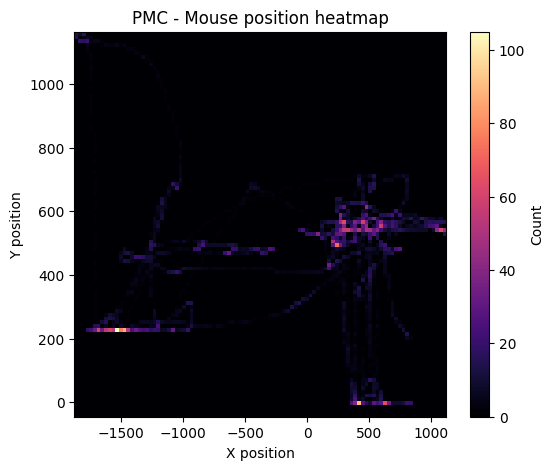

In [42]:
plot_heatmap(pmc, xcol="x", ycol="y", title="PMC - Mouse position heatmap")

### 3.2 Speed distribution

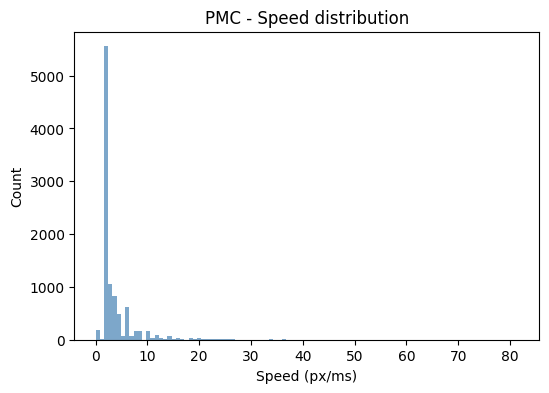

In [45]:
plot_hist(pmc["speed"], bins=100,
          title="PMC - Speed distribution",
          xlabel="Speed (px/ms)")


### 3.3 Idle time gaps

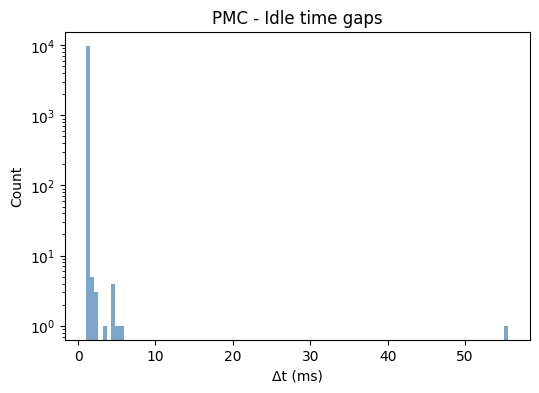

In [51]:
plot_hist(pmc["dt"], bins=100,
          title="PMC - Idle time gaps",
          xlabel="Δt (ms)",
          logy=True)

## 4. OUR data — EDA

### 4.1 Heatmap of mouse positions

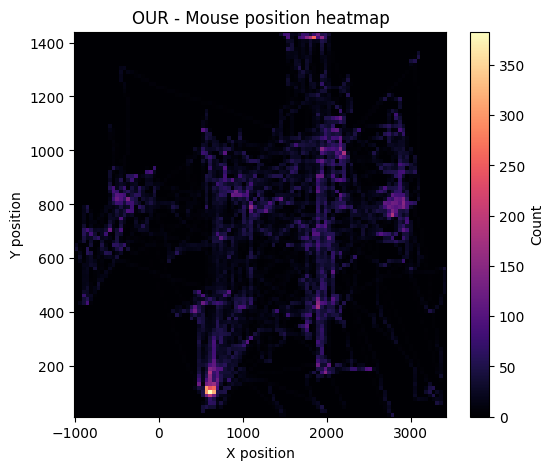

In [36]:
plot_heatmap(our, xcol="x_screen", ycol="y_screen", title="OUR - Mouse position heatmap")


### 4.2 Speed distribution

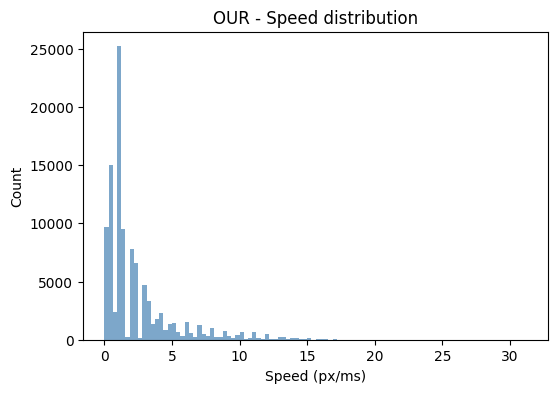

In [37]:
our = add_deltas(our, "x_screen", "y_screen", "wall_time_ms")
plot_hist(our["speed"], bins=100, 
          title="OUR - Speed distribution", 
          xlabel="Speed (px/ms)")

### 4.3 Idle time gaps

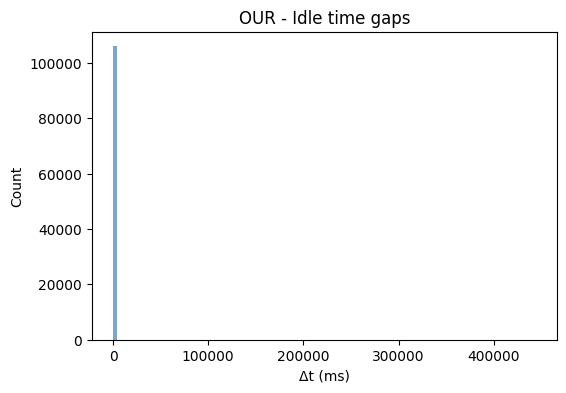

In [38]:
plot_hist(our["dt"], bins=100, 
          title="OUR - Idle time gaps", 
          xlabel="Δt (ms)")